In [1]:
!mkdir ~p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [19]:
!kaggle datasets download -d utkarshsaxenadn/car-vs-bike-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/utkarshsaxenadn/car-vs-bike-classification-dataset
License(s): CC0-1.0
 87% 89.0M/103M [00:01<00:00, 59.0MB/s]
100% 103M/103M [00:01<00:00, 57.1MB/s] 


In [20]:
import zipfile
zip_ref=zipfile.ZipFile('/content/car-vs-bike-classification-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [27]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense , Flatten , Conv2D , MaxPooling2D , Dropout , BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
data=keras.utils.image_dataset_from_directory(
    directory='/content/Car-Bike-Dataset',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)

)

Found 4000 files belonging to 2 classes.


In [33]:
datagen = ImageDataGenerator(validation_split=0.3)

train = datagen.flow_from_directory(
    directory='/content/Car-Bike-Dataset',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    subset='training')

validation = datagen.flow_from_directory(
    '/content/Car-Bike-Dataset',
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation')


Found 2800 images belonging to 2 classes.
Found 1200 images belonging to 2 classes.


In [45]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))



In [46]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [47]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [48]:
history=model.fit_generator(train,epochs=10,validation_data=test)

Epoch 1/10


<ipython-input-48-217c81bfdac6>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train,epochs=10,validation_data=test)


21/88 [======>.......................] - ETA: 8s - loss: 10.1751 - accuracy: 0.6577

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


88/88 [==============================] - 15s 129ms/step - loss: 4.8573 - accuracy: 0.7321 - val_loss: 1.5345 - val_accuracy: 0.7211
Epoch 2/10
88/88 [==============================] - 11s 125ms/step - loss: 1.4843 - accuracy: 0.8271 - val_loss: 0.8399 - val_accuracy: 0.8053
Epoch 3/10
88/88 [==============================] - 11s 127ms/step - loss: 0.6458 - accuracy: 0.8793 - val_loss: 0.4807 - val_accuracy: 0.8395
Epoch 4/10
88/88 [==============================] - 11s 121ms/step - loss: 0.4013 - accuracy: 0.9136 - val_loss: 0.4850 - val_accuracy: 0.8816
Epoch 5/10
88/88 [==============================] - 11s 120ms/step - loss: 0.3543 - accuracy: 0.9368 - val_loss: 0.6306 - val_accuracy: 0.8316
Epoch 6/10
88/88 [==============================] - 11s 125ms/step - loss: 0.2087 - accuracy: 0.9429 - val_loss: 0.4770 - val_accuracy: 0.8737
Epoch 7/10
88/88 [==============================] - 12s 135ms/step - loss: 0.1678 - accuracy: 0.9557 - val_loss: 11.2664 - val_accuracy: 0.5526
Epoch 8/1

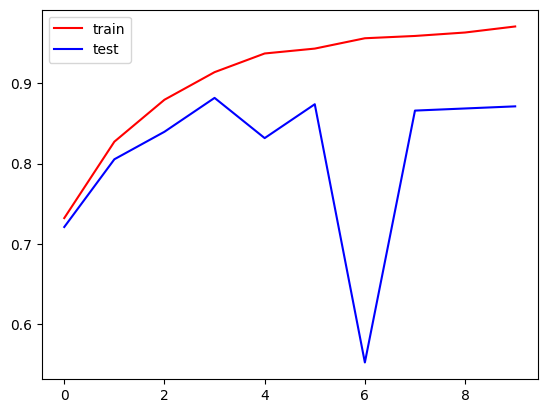

In [49]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()

1/1 [==============================] - 0s 44ms/step


array([[2.2673801e-05]], dtype=float32)

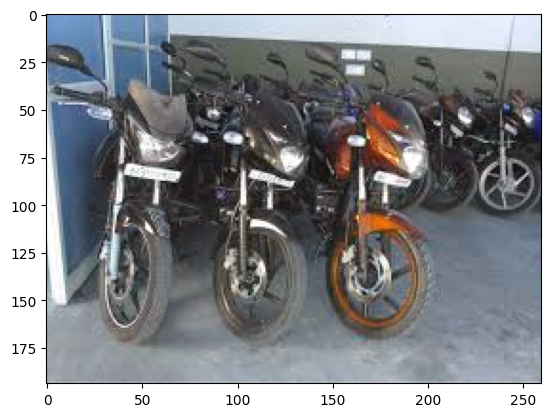

In [56]:

img=cv2.imread('/content/Bike and Car/Train/bikes/download (29).jpg')

plt.imshow(img)
img=cv2.resize(img,(256,256))
img=img.reshape(1,256,256,3)
model.predict(img)

1/1 [==============================] - 0s 18ms/step


array([[0.9256636]], dtype=float32)

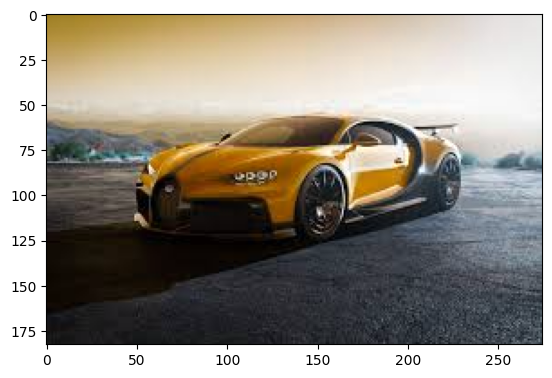

In [51]:


img=cv2.imread('/content/Bike and Car/Test/Car/download (13).jpg')

plt.imshow(img)
img=cv2.resize(img,(256,256))
img=img.reshape(1,256,256,3)
model.predict(img)

1/1 [==============================] - 0s 18ms/step


array([[1.476668e-14]], dtype=float32)

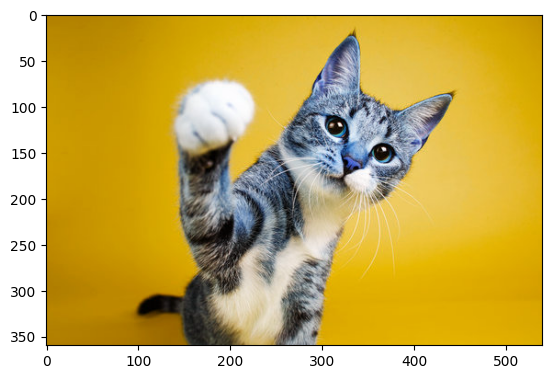

In [52]:

img=cv2.imread('/content/catty.jpg')
plt.imshow(img)
img=cv2.resize(img,(256,256))
img=img.reshape(1,256,256,3)
model.predict(img)